In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
stations = pd.read_csv('citibike-stations.csv')
trips = pd.read_csv('citibike-trips.csv')

In [3]:
stations.head()

station_id_int                           name short_name   latitude  \
0            3664  North Moore St & Greenwich St    5470.12  40.720195   
1            4682        W 34 St & Hudson Blvd E    6535.04  40.755167   
2            3233                E 48 St & 5 Ave    6626.01  40.757246   
3             244       Willoughby Ave & Hall St    4611.03  40.691960   
4             525               W 34 St & 11 Ave    6578.01  40.755942   

   longitude  region_id   rental_methods  capacity  eightd_has_key_dispenser  \
0 -74.010301         71  KEY, CREDITCARD        29                     False   
1 -74.000599         71  KEY, CREDITCARD        57                     False   
2 -73.978059         71  KEY, CREDITCARD        62                     False   
3 -73.965369         71  KEY, CREDITCARD        51                     False   
4 -74.002116         71  KEY, CREDITCARD        80                     False   

   num_bikes_available  num_bikes_disabled  num_docks_available  \
0                    2                   1                    0   
1                    2                   1                   52   
2                    2                   1                   43   
3                   12                   1                   32   
4                   35                   1                   22   

   num_docks_disabled  is_installed  is_renting  is_returning  \
0                  29          True        True          True   
1                   2          True        True          True   
2                  14          True        True          True   
3                   6          True        True          True   
4                  19          True        True          True   

   eightd_has_available_keys                   last_reported  
0                      False  2023-02-03 00:04:54.000000 UTC  
1                      False  2023-02-03 00:05:54.000000 UTC  
2                      False  2023-02-03 00:01:27.000000 UTC  
3                      False  2023-02-03 00:01:22.000000 UTC  
4                      False  2023-02-03 00:02:45.000000 UTC

In [4]:
trips.head()

tripduration            starttime             stoptime  start_station_id  \
0          2319  2016-03-09 13:08:21  2016-03-09 13:47:01               520   
1           313  2015-07-09 15:42:30  2015-07-09 15:47:44               520   
2           798  2017-04-20 18:43:59  2017-04-20 18:57:17               520   
3          3100  2017-04-23 15:23:46  2017-04-23 16:15:26               520   
4           906  2016-01-11 18:32:33  2016-01-11 18:47:39               520   

  start_station_name  start_station_latitude  start_station_longitude  \
0    W 52 St & 5 Ave               40.759923               -73.976485   
1    W 52 St & 5 Ave               40.759923               -73.976485   
2    W 52 St & 5 Ave               40.759923               -73.976485   
3    W 52 St & 5 Ave               40.759923               -73.976485   
4    W 52 St & 5 Ave               40.759923               -73.976485   

   end_station_id                   end_station_name  end_station_latitude  \
0             363                     West Thames St             40.708347   
1             493                    W 45 St & 6 Ave             40.756800   
2            3258                   W 27 St & 10 Ave             40.750182   
3             281  Grand Army Plaza & Central Park S             40.764397   
4            3162                 W 78 St & Broadway             40.783400   

   end_station_longitude  bikeid    usertype  birth_year   gender  \
0             -74.017134   23062  Subscriber      1972.0     male   
1             -73.982912   16909  Subscriber      1968.0   female   
2             -74.002184   15555  Subscriber      1991.0     male   
3             -73.973715   20648    Customer         NaN  unknown   
4             -73.980931   15614  Subscriber      1961.0     male   

   customer_plan  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

### Trip data for this dataset is a 1% random sample, so some values appear small when in reality they must be multiplied by 100 to get realistic values. In the future I would like to train this model with the Google BigQuery dataset (no 1% sampling) and see the results.

In [11]:
# Add a trip_id column based on the index
trips['trip_id'] = trips.index

In [12]:
# Convert starttime column to datetime format
trips['starttime'] = pd.to_datetime(trips['starttime'])


In [13]:
import pandas as pd
import folium

# Filter trips to only include trips in 2015
trips = trips[trips['starttime'].dt.year == 2015]

# Group by end station coordinates and count the number of trips
end_counts = trips.groupby(['end_station_latitude', 'end_station_longitude'])['tripduration'].count().reset_index(name='end_count')

# Find the most popular end locations
most_popular_end = end_counts.sort_values('end_count', ascending=False).iloc[0]
top_end_locations = end_counts.sort_values('end_count', ascending=False).iloc[:20]

# Create a map and add markers for the most popular start locations
m = folium.Map(location=[most_popular_end['end_station_latitude'], most_popular_end['end_station_longitude']], zoom_start=13)

folium.Marker(
    location=[most_popular_end['end_station_latitude'], most_popular_end['end_station_longitude']],
    popup='Most popular end location',
    icon=folium.Icon(color='red')
).add_to(m)

# Add markers for the top 20 most popular end locations
for i in range(len(top_end_locations)):
    rank = i + 1
    row = top_end_locations.iloc[i]
    color = 'blue' if rank > 1 else 'red'
    folium.Marker(
        location=[row['end_station_latitude'], row['end_station_longitude']],
        popup=f"Rank {rank}: Approximately {round(row['end_count'])*100} trips ended here in 2015!",
        icon=folium.Icon(color=color, icon_number=rank, prefix='glyphicon')
    ).add_to(m)

m

In [14]:
start_counts = trips.groupby(['start_station_latitude', 'start_station_longitude'])['tripduration'].count().reset_index(name='start_count')

most_popular_start = start_counts.sort_values('start_count', ascending=False).iloc[0]
top_start_locations = start_counts.sort_values('start_count', ascending=False).iloc[:20]

m = folium.Map(location=[most_popular_start['start_station_latitude'], most_popular_start['start_station_longitude']], zoom_start=13)

folium.Marker(
    location=[most_popular_start['start_station_latitude'], most_popular_start['start_station_longitude']],
    popup='Most popular start location',
    icon=folium.Icon(color='green')
).add_to(m)

# Add markers for the top 20 most popular start locations
for i in range(len(top_start_locations)):
    rank = i + 1
    row = top_start_locations.iloc[i]
    color = 'blue' if rank > 1 else 'red'
    folium.Marker(
        location=[row['start_station_latitude'], row['start_station_longitude']],
        popup=f"Rank {rank}: Approximately {round(row['start_count'])*100} trips started here in 2015!",
        icon=folium.Icon(color=color, icon_number=rank, prefix='glyphicon')
    ).add_to(m)

m

In [15]:
import folium

# create a map object with the initial location
map_stations = folium.Map(location=[40.7589, -73.9851], zoom_start=12)

# loop through each station in the dataframe
for index, row in stations.iterrows():
    # create a popup message that shows the station name and the number of available bikes
    popup_text = f"{row['name']}<br>Available bikes: {row['num_bikes_available']}"

    # create a marker with the popup message and add it to the map
    marker = folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_text)
    marker.add_to(map_stations)

# display the map
map_stations


In [16]:
import folium
from folium.plugins import HeatMap

# Group stations based on their latitude and longitude
station_groups = stations.groupby(['latitude', 'longitude']).size().reset_index(name='count')

# Create map centered on NYC
map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Create heatmap layer
heatmap = HeatMap(data=station_groups[['latitude', 'longitude', 'count']], 
                  name='Stations Heatmap', 
                  radius=15)

# Add heatmap layer to map
heatmap.add_to(map)

# Add layer control to map
folium.LayerControl().add_to(map)

# Display map
map


In [17]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Sample 100 random trips
sample_trips = trips.sample(250)

# Create a map centered on New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Plot the trajectory of each trip on the map
for index, row in sample_trips.iterrows():
    trip_points = [(row['start_station_latitude'], row['start_station_longitude']), 
                   (row['end_station_latitude'], row['end_station_longitude'])]
    folium.PolyLine(trip_points, color='blue', weight=2.5, opacity=1).add_to(nyc_map)

# Display the map
nyc_map


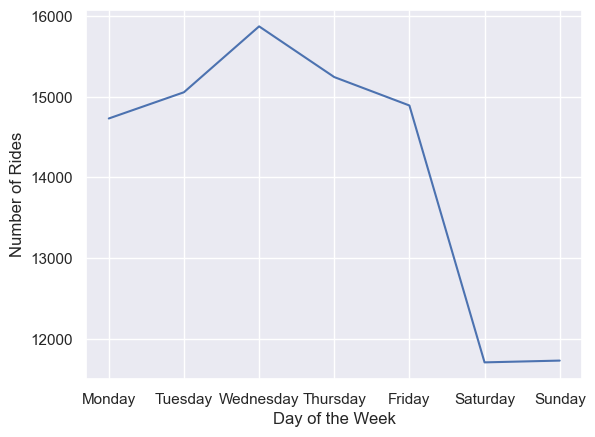

In [18]:
# Convert to datetime values then to day of week
trips['starttime'] = pd.to_datetime(trips['starttime'])
trips['day_of_week'] = trips['starttime'].dt.dayofweek

# Create a new column for the day of the week using the dt.dayofweek attribute of the datetime object.
trips_by_day = trips.groupby('day_of_week').size().reset_index(name='count')

plt.plot(trips_by_day['day_of_week'], trips_by_day['count'])
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()


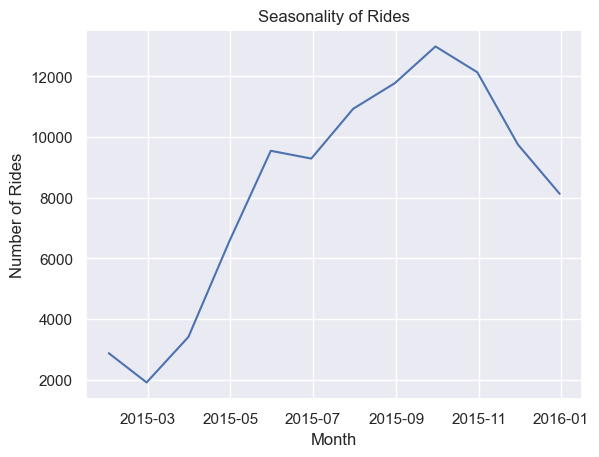

In [19]:
# Group trips by month
trips_monthly = trips.groupby(pd.Grouper(key='starttime', freq='M')).size()

# Plot line graph
plt.plot(trips_monthly.index, trips_monthly.values)
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Seasonality of Rides')
plt.show()


In [20]:
# convert start time to datetime and extract year and month
trips['starttime'] = pd.to_datetime(trips['starttime'])
trips['year_month'] = trips['starttime'].dt.strftime('%Y-%m')

# get all unique year-month combinations in the dataset
all_dates = pd.date_range(start=trips['starttime'].min(), end=trips['starttime'].max(), freq='MS').strftime('%Y-%m')

# create a set of all unique year-month combinations with 0 trips
missing_dates = set(all_dates) - set(trips['year_month'])

# display the missing year-month combinations
print(missing_dates)

# Now we know the months with no trips.


set()


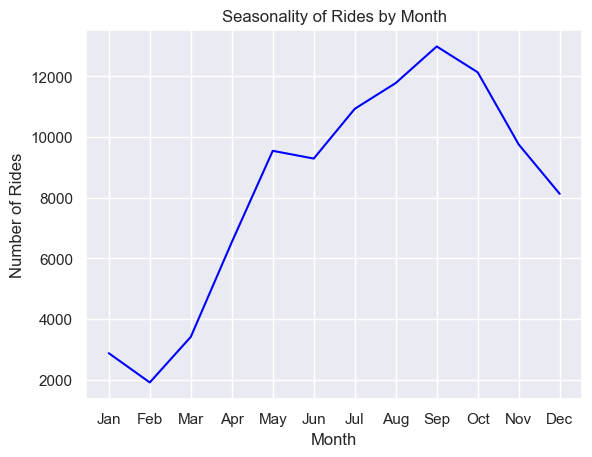

In [21]:
# Convert starttime to datetime format
trips['starttime'] = pd.to_datetime(trips['starttime'])

# Create a new column for month of the trip
trips['month'] = trips['starttime'].dt.month

# Group trips by month and count number of trips
trips_by_month = trips.groupby('month').size()

# Calculate the average trips per month
avg_trips_per_month = trips_by_month.mean()

# Plot the average trips per month
plt.plot(trips_by_month.index, trips_by_month.values, color='blue')

# Set x-axis label and tick labels
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set y-axis label and tick labels
plt.ylabel('Number of Rides')

# Set plot title
plt.title('Seasonality of Rides by Month')

# Show the plot
plt.show()

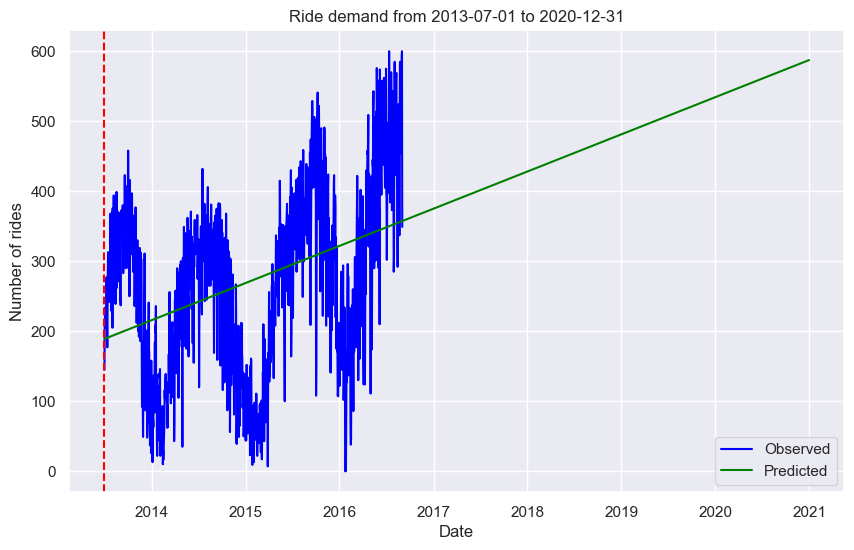

In [22]:
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
trips = pd.read_csv('citibike-trips.csv')

# Convert starttime to a datetime object
trips['starttime'] = pd.to_datetime(trips['starttime'])

# Create a new DataFrame with the number of trips per day
daily_trips = trips.groupby(pd.Grouper(key='starttime', freq='D')).size().reset_index(name='counts')

# Filter data from minimum until September 2016
start_date = daily_trips['starttime'].min()
end_date = pd.to_datetime('2016-09-01')
data = daily_trips[(daily_trips['starttime'] >= start_date) & (daily_trips['starttime'] <= end_date)]

# Train a linear regression model on the data
model = LinearRegression()
X = pd.to_datetime(data['starttime']).apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = data['counts'].values.reshape(-1, 1)
model.fit(X, y)

# Predict the counts for the future dates using the trained model
future_dates = pd.date_range(start=start_date, end=pd.to_datetime('2020-12-31'))
X_future = pd.Series(future_dates).apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y_pred = model.predict(X_future)

# Create a DataFrame with the predicted counts and future dates
predictions = pd.DataFrame({'date': future_dates, 'counts': y_pred.reshape(-1)})

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['starttime'], data['counts'], color='blue', label='Observed')
ax.plot(predictions['date'], predictions['counts'], color='green', label='Predicted')
ax.axvline(start_date, color='red', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Number of rides')
ax.set_title('Ride demand from {} to {}'.format(start_date.strftime('%Y-%m-%d'), pd.to_datetime('2020-12-31').strftime('%Y-%m-%d')))
ax.legend()
plt.show()


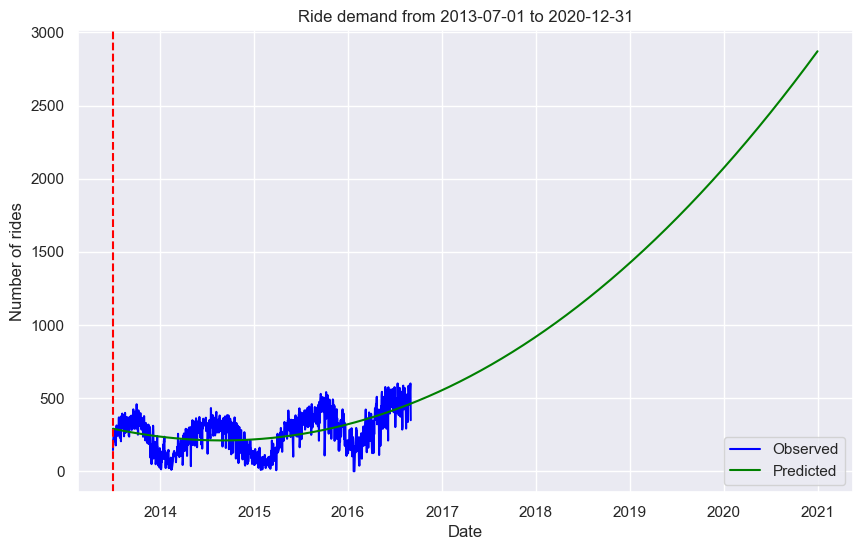

In [23]:
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
trips = pd.read_csv('citibike-trips.csv')

# Convert starttime to a datetime object
trips['starttime'] = pd.to_datetime(trips['starttime'])

# Create a new DataFrame with the number of trips per day
daily_trips = trips.groupby(pd.Grouper(key='starttime', freq='D')).size().reset_index(name='counts')

# Filter data from minimum until September 2016
start_date = daily_trips['starttime'].min()
end_date = pd.to_datetime('2016-09-01')
data = daily_trips[(daily_trips['starttime'] >= start_date) & (daily_trips['starttime'] <= end_date)]

# Train a polynomial regression model on the data
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(pd.to_datetime(data['starttime']).apply(lambda x: x.timestamp()).values.reshape(-1, 1))
model = LinearRegression()
model.fit(X_poly, data['counts'].values.reshape(-1, 1))

# Predict the counts for the future dates using the trained model
future_dates = pd.date_range(start=start_date, end=pd.to_datetime('2020-12-31'))
X_future_poly = poly.fit_transform(pd.Series(future_dates).apply(lambda x: x.timestamp()).values.reshape(-1, 1))
y_pred = model.predict(X_future_poly)

# Create a DataFrame with the predicted counts and future dates
predictions = pd.DataFrame({'date': future_dates, 'counts': y_pred.reshape(-1)})

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['starttime'], data['counts'], color='blue', label='Observed')
ax.plot(predictions['date'], predictions['counts'], color='green', label='Predicted')
ax.axvline(start_date, color='red', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Number of rides')
ax.set_title('Ride demand from {} to {}'.format(start_date.strftime('%Y-%m-%d'), pd.to_datetime('2020-12-31').strftime('%Y-%m-%d')))
ax.legend()
plt.show()


# Adventures in SARIMAX

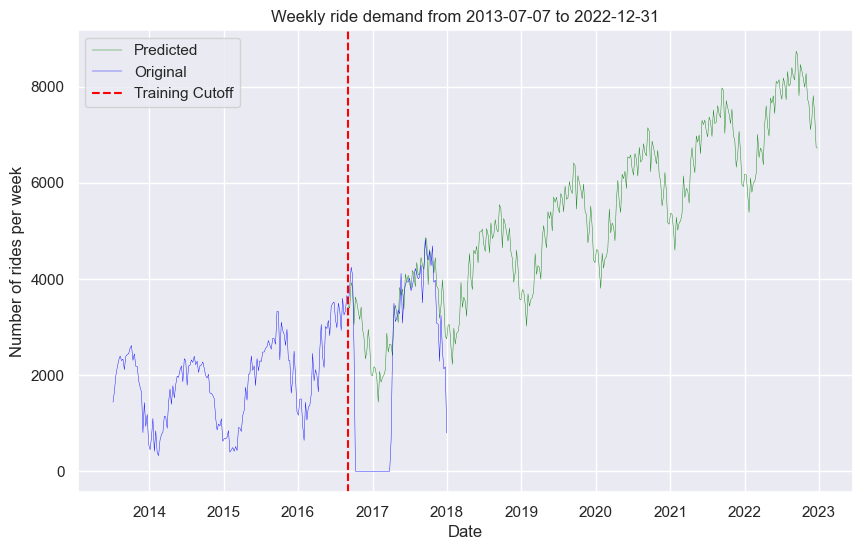

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # Error because there isn't much train data. Whatever!

# Load the data
trips = pd.read_csv('citibike-trips.csv')

# Convert starttime to a datetime object
trips['starttime'] = pd.to_datetime(trips['starttime'])

# Create a new DataFrame with the number of trips per week
weekly_trips = trips.groupby(pd.Grouper(key='starttime', freq='W')).size().reset_index(name='counts')

# Filter data from minimum until September 2016
start_date = weekly_trips['starttime'].min()
end_date = pd.to_datetime('2016-09-01')
data = weekly_trips[(weekly_trips['starttime'] >= start_date) & (weekly_trips['starttime'] <= end_date)]

# Define the SARIMA model, give high weight to winter.
model = SARIMAX(data['counts'], order=(2, 1, 1), seasonal_order=(1, 1, 1, 52))

# Fit the model
model_fit = model.fit(disp=False)

# Predict the counts for the future dates using the trained model
future_dates = pd.date_range(start=end_date + pd.DateOffset(days=1), end=pd.to_datetime('2022-12-31'), freq='W')
y_pred = model_fit.predict(start=0, end=len(data) + len(future_dates) - 1, freq='W')

# Create a DataFrame with the predicted counts and future dates
predictions = pd.DataFrame({'date': pd.date_range(start_date, end=end_date + pd.DateOffset(days=1), freq='W') \
                            .append(future_dates), 'counts': y_pred})

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(predictions[predictions['date'] > end_date]['date'], 
        predictions[predictions['date'] > end_date]['counts'], 
        color='green', label='Predicted', linewidth=.3)
ax.plot(weekly_trips['starttime'], weekly_trips['counts'], color='blue', label='Original', linewidth=.3)
ax.axvline(end_date, color='red', linestyle='--', label='Training Cutoff')
ax.set_xlabel('Date')
ax.set_ylabel('Number of rides per week')
ax.set_title('Weekly ride demand from {} to {}'.format(start_date.strftime('%Y-%m-%d'), pd.to_datetime('2022-12-31').strftime('%Y-%m-%d')))
ax.legend()
plt.show()


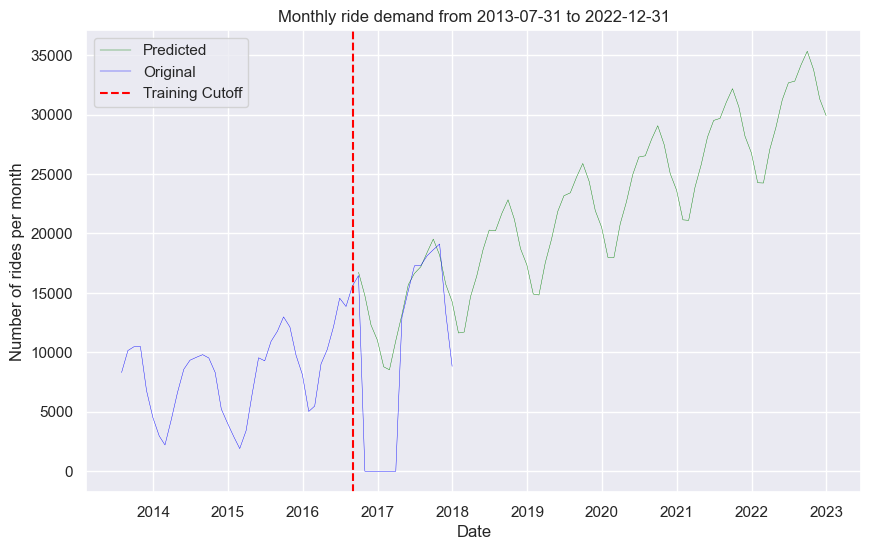

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore", category=UserWarning) # Error because there isn't much train data. Whatever!

# Load the data
trips = pd.read_csv('citibike-trips.csv')

# Convert starttime to a datetime object
trips['starttime'] = pd.to_datetime(trips['starttime'])

# Create a new DataFrame with the number of trips per month
monthly_trips = trips.groupby(pd.Grouper(key='starttime', freq='M')).size().reset_index(name='counts')

# Filter data from minimum until September 2016
start_date = monthly_trips['starttime'].min()
end_date = pd.to_datetime('2016-09-01')
data = monthly_trips[(monthly_trips['starttime'] >= start_date) & (monthly_trips['starttime'] <= end_date)]

# Define the SARIMA model, give high weight to winter.
model = SARIMAX(data['counts'], order=(2, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
model_fit = model.fit(disp=False)

# Predict the counts for the future dates using the trained model
future_dates = pd.date_range(start=end_date + pd.DateOffset(days=1), end=pd.to_datetime('2022-12-31'), freq='M')
y_pred = model_fit.predict(start=0, end=len(data) + len(future_dates) - 1, freq='M')

# Create a DataFrame with the predicted counts and future dates
predictions = pd.DataFrame({'date': pd.date_range(start_date, end=end_date + pd.DateOffset(days=1), freq='M') \
                            .append(future_dates), 'counts': y_pred})

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(predictions[predictions['date'] > end_date]['date'], 
        predictions[predictions['date'] > end_date]['counts'], 
        color='green', label='Predicted', linewidth=.3)
ax.plot(monthly_trips['starttime'], monthly_trips['counts'], color='blue', label='Original', linewidth=.3)
ax.axvline(end_date, color='red', linestyle='--', label='Training Cutoff')
ax.set_xlabel('Date')
ax.set_ylabel('Number of rides per month')
ax.set_title('Monthly ride demand from {} to {}'.format(start_date.strftime('%Y-%m-%d'), pd.to_datetime('2022-12-31').strftime('%Y-%m-%d')))
ax.legend()
plt.show()


In [26]:
july_2018_predictions = predictions[(predictions['date'].dt.year == 2018) & (predictions['date'].dt.month == 7)]
july_2018_demand = july_2018_predictions['counts'].sum() * 100

july_2019_predictions = predictions[(predictions['date'].dt.year == 2019) & (predictions['date'].dt.month == 7)]
july_2019_demand = july_2019_predictions['counts'].sum() * 100

july_2020_predictions = predictions[(predictions['date'].dt.year == 2020) & (predictions['date'].dt.month == 7)]
july_2020_demand = july_2020_predictions['counts'].sum() * 100

july_2021_predictions = predictions[(predictions['date'].dt.year == 2021) & (predictions['date'].dt.month == 7)]
july_2021_demand = july_2021_predictions['counts'].sum() * 100

july_2022_predictions = predictions[(predictions['date'].dt.year == 2022) & (predictions['date'].dt.month == 7)]
july_2022_demand = july_2022_predictions['counts'].sum() * 100


# Create a dictionary to store the data
data = {
    'Year': ['2022', '2021', '2020', '2019', '2018'],
    'Month': ['July', 'July', 'July', 'July', 'July'],
    'Forecast': [round(july_2022_demand), round(july_2021_demand), round(july_2020_demand), round(july_2019_demand), round(july_2018_demand)],
    'Actual': [3388448, 3082792, 2237699, 2225392, 1913639],
    'Difference': [(3388448-july_2022_demand)/3388448*100, (3082792-july_2021_demand)/3082792*100, (2237699-july_2020_demand)/2237699*100, (2225392-july_2019_demand)/2225392*100, (1913639-july_2018_demand)/1913639*100]
}

# Create a data frame from the dictionary
df = pd.DataFrame(data)

# Print the DataFrame
df.head()

Year Month  Forecast   Actual  Difference
0  2022  July   3280722  3388448    3.179208
1  2021  July   2967643  3082792    3.735218
2  2020  July   2652931  2237699  -18.556220
3  2019  July   2341594  2225392   -5.221631
4  2018  July   2023282  1913639   -5.729577

# The model is almost entirely spot on, obviously not taking into account 2020 (COVID-19). Data from 2018 onward is pulled from https://citibikenyc.com/system-data/operating-reports

## Note: The model still can't predict winter well, probably due to the limited train data.